# **BẦU CỬ TẠI ẤN ĐỘ NĂM 2019**




Dữ liệu được thu thập từ MyNeta.info do Hiệp hội Cải cách Dân chủ và trang web của Ủy ban Bầu cử Ấn Độ duy trì. Dữ liệu nói về cuộc tổng tuyển cử vào Lok Sabha(Hạ viện) của nền dân chủ lớn nhất thế giới với hơn 600 triệu cử tri bỏ phiếu cho hơn 8500 ứng cử viên trên 543 khu vực bầu cử. Tập dữ liệu này sẽ cung cấp cho chúng ta những thông tin cá nhân cơ bản của từng ứng cử viên và số phiếu mà họ đã nhận được để có cái nhìn tổng quan về cuộc tổng tuyển cử.

Nhiệm vụ chính trên tập dữ liệu: Phân tích EDA để hình dung tác động của các yếu tố ảnh hưởng như thế nào đến kết quả trúng cử của các ứng viên và sử dụng Machine Learning để dự đoán cơ hội chiến thắng của ứng viên

## **XỬ LÝ DỮ LIỆU**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/sample_data/LS_2.0.csv')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL\nCASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL\nVOTES,POSTAL\nVOTES,TOTAL\nVOTES,OVER TOTAL ELECTORS \nIN CONSTITUENCY,OVER TOTAL VOTES POLLED \nIN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
df.shape

(2263, 19)

Nhìn vào đây thì ta thấy được tập dữ liệu có 2263 hàng và 19 cột

**Đổi tên các cột**

In [ ]:
df.columns = df.columns.str.replace('\n',' ')
df.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
3,Telangana,ADILABAD,NOTA,0,NOTA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13030,6,13036,0.875023,1.225214,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   STATE                                     2263 non-null   object 
 1   CONSTITUENCY                              2263 non-null   object 
 2   NAME                                      2263 non-null   object 
 3   WINNER                                    2263 non-null   int64  
 4   PARTY                                     2263 non-null   object 
 5   SYMBOL                                    2018 non-null   object 
 6   GENDER                                    2018 non-null   object 
 7   CRIMINAL CASES                            2018 non-null   object 
 8   AGE                                       2018 non-null   float64
 9   CATEGORY                                  2018 non-null   object 
 10  EDUCATION                           

Thông tin cho ta thấy được có 8 cột bị thiếu dữ liệu như: SYMBOL, GENDER, CRIMINAL CASES, AGE, CATEGORY, EDUCATION, ASSETS và LIABILITIES. Có 3 kiểu dữ liệu trong tập dữ liệu này là object, int64 và float 64.

**Xác định các giá trị Null trong các cột**

In [ ]:
df.isnull().sum()

STATE                                         0
CONSTITUENCY                                  0
NAME                                          0
WINNER                                        0
PARTY                                         0
SYMBOL                                      245
GENDER                                      245
CRIMINAL CASES                              245
AGE                                         245
CATEGORY                                    245
EDUCATION                                   245
ASSETS                                      245
LIABILITIES                                 245
GENERAL VOTES                                 0
POSTAL VOTES                                  0
TOTAL VOTES                                   0
OVER TOTAL ELECTORS  IN CONSTITUENCY          0
OVER TOTAL VOTES POLLED  IN CONSTITUENCY      0
TOTAL ELECTORS                                0
dtype: int64

Các cột "SYMBOL, GENDER, CRIMINAL CASES, AGE, CATEGORY, EDUCATION, ASSETS và LIABILITIES" đều có 245 giá trị bị thiếu.

**Xác định các mục nhập rỗng trong dữ liệu**

In [ ]:
df[df.SYMBOL.isnull()==True]['NAME'].unique()

array(['NOTA'], dtype=object)

**Xóa các giá trị Null và các giá trị trùng của các cột**

Các giá trị NULL bao gồm các bản ghi NOTA (Không có ở trên). Vì lúc này nó không thật sự cần thiết nên chúng tôi sẽ tạo một bản sao từ dữ liệu gốc rồi loại trừ tất cả các bản ghi NOTA.

In [ ]:
df1 = df.copy()
df_exclude_NOTA= df1.dropna()
df_exclude_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [ ]:
df_exclude_NOTA = df_exclude_NOTA.drop_duplicates()
df_exclude_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,"Rs 30,99,414\n ~ 30 Lacs+","Rs 2,31,450\n ~ 2 Lacs+",376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,"Rs 1,84,77,888\n ~ 1 Crore+","Rs 8,47,000\n ~ 8 Lacs+",318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,"Rs 3,64,91,000\n ~ 3 Crore+","Rs 1,53,00,000\n ~ 1 Crore+",314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,"Rs 7,42,74,036\n ~ 7 Crore+","Rs 86,06,522\n ~ 86 Lacs+",644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,"Rs 13,37,84,385\n ~ 13 Crore+","Rs 2,22,51,891\n ~ 2 Crore+",434199,1130,435329,22.466390,37.999125,1937690


In [ ]:
df_exclude_NOTA.shape

(2018, 19)

**Xử lý cột ASSETS và cột LIABILITIES**

In [ ]:
def value_cleaner(x):
    try:
        str_temp = (x.split('Rs')[1].split('\n')[0].strip())
        str_temp_2 = ''
        for i in str_temp.split(","):
            str_temp_2 = str_temp_2+i
        return str_temp_2
    except:
        x = 0
        return x
df_exclude_NOTA['ASSETS'] = df_exclude_NOTA['ASSETS'].apply((value_cleaner))
df_exclude_NOTA['LIABILITIES'] = df_exclude_NOTA['LIABILITIES'].apply((value_cleaner))
df_exclude_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


**Xử lý cột EDUCATION (trình độ học vấn) của các ứng cử viên**



In [ ]:
df_exclude_NOTA.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available', 'Post Graduate\n'],
      dtype=object)

In [ ]:
df_exclude_NOTA.EDUCATION.replace({'Post Graduate\n':'Post Graduate'},inplace=True)
df_exclude_NOTA.EDUCATION.unique()

array(['12th Pass', 'Post Graduate', 'Doctorate', 'Graduate', 'Others',
       '10th Pass', '8th Pass', 'Graduate Professional', 'Literate',
       'Illiterate', '5th Pass', 'Not Available'], dtype=object)

**Xác định các mục nhập chênh lệch trong các cột**

In [ ]:
df_exclude_NOTA[df_exclude_NOTA['CRIMINAL CASES']=='Not Available'].head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
468,Bihar,BUXAR,Ramchandra Singh Yadav,0,IND,Almirah,MALE,Not Available,42.0,GENERAL,Not Available,0,0,10721,9,10730,0.586540,1.087175,1829373
532,Tamil Nadu,CHIDAMBARAM,SIVAJOTHI M,0,NTK,Ganna Kisan,MALE,Not Available,35.0,SC,Not Available,0,0,37329,142,37471,2.531445,3.246331,1480222
612,Uttar Pradesh,DEORIA,BINOD KUMAR JAISWAL,0,BSP,Elephant,MALE,Not Available,56.0,GENERAL,Not Available,0,0,327728,2985,330713,18.852693,32.563441,1754195
613,Uttar Pradesh,DEORIA,NIYAZ AHMED,0,INC,Hand,MALE,Not Available,57.0,GENERAL,Not Available,0,0,50749,307,51056,2.910509,5.027196,1754195
654,Tamil Nadu,DINDIGUL,"JOTHIMUTHU, K.",0,PMK,Mango,MALE,Not Available,48.0,GENERAL,Not Available,0,0,206782,769,207551,13.460896,17.877979,1541881


**Cập nhật các kiểu dữ liệu**

In [ ]:
df_exclude_NOTA['ASSETS'] = pd.to_numeric(df_exclude_NOTA['ASSETS'])
df_exclude_NOTA['LIABILITIES']=pd.to_numeric(df_exclude_NOTA['LIABILITIES'])
df_exclude_NOTA['CRIMINAL CASES'].replace({np.NaN:0})
df_exclude_NOTA['CRIMINAL CASES'] = pd.to_numeric(df_exclude_NOTA['CRIMINAL CASES'], errors='coerce').fillna(0).astype(np.int64)

**Dữ liệu sau khi được xử lý và cập nhật:**

In [ ]:
df_exclude_NOTA.describe()

,WINNER,CRIMINAL CASES,AGE,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
count,2018.000000,2018.000000,2018.000000,2.018000e+03,2.018000e+03,2.018000e+03,2018.000000,2.018000e+03,2018.000000,2018.000000,2.018000e+03
mean,0.267096,1.453915,52.273538,1.315849e+08,1.973860e+07,2.911903e+05,1105.111001,2.922954e+05,17.596810,25.808492,1.660261e+06
std,0.442553,7.636973,11.869373,4.122697e+08,8.945292e+07,2.545964e+05,1661.283371,2.555874e+05,14.886247,21.403985,3.164246e+05
min,0.000000,0.000000,25.000000,0.000000e+00,0.000000e+00,1.339000e+03,0.000000,1.342000e+03,0.097941,1.000039,5.518900e+04
25%,0.000000,0.000000,43.250000,6.272526e+06,0.000000e+00,3.047625e+04,97.000000,3.074375e+04,1.953617,2.870669,1.530404e+06
50%,0.000000,0.000000,52.000000,2.404181e+07,9.039245e+05,2.846300e+05,463.000000,2.855250e+05,18.036861,27.749894,1.679891e+06
75%,1.000000,1.000000,61.000000,9.152498e+07,6.097971e+06,5.058620e+05,1545.500000,5.076175e+05,30.708115,44.349684,1.823404e+06
max,1.000000,240.000000,86.000000,8.950179e+09,1.547511e+09,1.066824e+06,19367.000000,1.068569e+06,51.951012,74.411856,3.150313e+06


Sau khi xử lý và cập nhật dữ liệu thì:
* Chỉ còn 2018 hàng tương ứng 2018 ứng cử viên đã tham gia tranh cử vào Lok Sabha.  
* Độ tuổi trung bình của các ứng cử viên là 52. 
* Ứng cử viên trẻ nhất chỉ mới 25 tuổi còn ứng cử viên già nhất là 86.
* Có 19367 phiếu bầu được thực hiện qua thư trong cuộc bầu cử.

In [ ]:
df_exclude_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690


**Tương quan giữa các biến:**

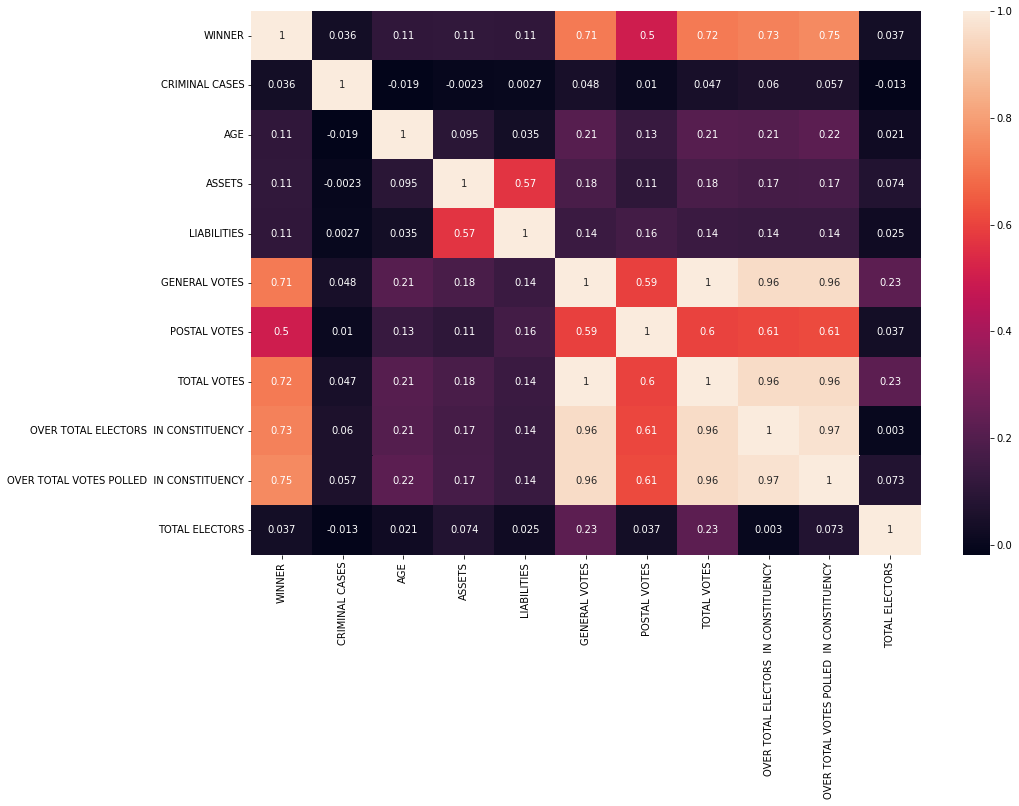

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_exclude_NOTA.corr(), annot=True)
plt.show()

Biểu đồ heatmap thể hiện sự tương quan giữa các biến, nếu càng gần 1 thì tương quan cùng chiều sẽ càng mạnh, gần 0 thì sẽ hầu như không tương quan và càng gần -1 thì tương quan ngược chiều sẽ càng mạnh


## **PHÂN TÍCH CÁC ĐẢNG**

**Tổng khu vực bầu cử mỗi bang**

In [ ]:
constituency= df_exclude_NOTA.groupby('STATE')['CONSTITUENCY'].nunique().reset_index().sort_values('CONSTITUENCY',ascending = False)
fig = px.bar(constituency, title= "Total Constituencies per State",x='STATE', y='CONSTITUENCY', color='CONSTITUENCY', height=600)
fig.show()

Bang Uttar Pradesh là bang đông dân nhất với 200 triệu dân,đồng thời là nơi quan trọng nhất đất nước và có nhiều vấn đề xung đột tôn giáo sắc tộc phức tạp vì thế cũng là bang có tỷ lệ khu vực bầu cử cao nhất với 80 khu vực bầu cử.
Thấp nhất là Andaman & Nicobar Islands, Goa, Nagaland, Puducherry, Mizoram, Dadra & Nagar Haveli, Sikkim, Chandiganrh,Lakshadweep, Daman & Diu với duy nhất một khu vực bầu cử. 


**Các ứng cử viên của Đảng phái**

In [ ]:
candidate = df_exclude_NOTA.PARTY.value_counts().reset_index().rename(columns = {'index':'Party','PARTY':'Total Candidates'}).head(50)
candidate = candidate[candidate['Party'] != 'NOTA']
fig = px.bar(candidate, title = "Candidates by party ",x='Party', y='Total Candidates', color='Total Candidates', height=500)
fig.show()

Lượng ứng cử viên tham gia của 2 đảng BJP và INC lần lượt là 420 và 413 vượt trội hơn so với các Đảng còn lại. Chúng ta hãy xem xem, số lượng ứng cử viên nhiều có đồng nghĩa với việc Đảng ấy có nhiều người thắng hay không?

**Cái nhìn tổng quan tổng lượt bỏ phiếu giữa các Đảng phái**








In [ ]:
top5_vote = df_exclude_NOTA.groupby('PARTY')['TOTAL VOTES'].sum().nlargest(5).index.tolist()
def vote_share(row):
    if row['PARTY'] not in top5_vote:
        return 'Other'
    else:
        return row['PARTY']
df_exclude_NOTA['Party New'] = df_exclude_NOTA.apply(vote_share,axis =1)
counts = df_exclude_NOTA.groupby('Party New')['TOTAL VOTES'].sum()
counts

Party New
AITC      24832104
BJP      228938556
BSP       20808194
INC      119418722
Other    180238181
SP        15616282
Name: TOTAL VOTES, dtype: int64

In [ ]:
labels = counts.index
values = counts.values
pie = go.Pie(labels=labels, values=values, marker=dict(line=dict(color='#000000', width=1)))
layout = go.Layout(title='Partywise Vote Share')
fig = go.Figure(data=[pie], layout=layout)
py.iplot(fig)

Ở trước đó chúng ta có thể thấy số ứng cử viên tham gia của Đảng INC cao gần bằng so với đảng BJP nhưng nhìn vào biểu đồ thì phần trăm bình chọn của BJP cao gần gấp đôi so với đảng INC cụ thể chúng ta sẽ đi vào phần lượng ghế thắng theo từng Đảng




**Lượng ghế thắng theo từng Đảng**

In [ ]:
winning_seat = df_exclude_NOTA.groupby(['PARTY','SYMBOL'])['WINNER'].sum().reset_index().sort_values('WINNER',ascending = False)
winning_seat = winning_seat[winning_seat['WINNER'] > 0]
fig = px.bar(winning_seat, title = "A number of seat won by party", x='PARTY', y='WINNER',hover_data =['SYMBOL'], color='WINNER', height=500)
fig.show()

Như ta đã thấy ở trên, 2 đảng BJP và đảng INC gần như luôn ở thế đối đầu với nhau khi các ứng cử viên của 2 bang là khá tương đương nhau. Tuy nhiên lượng ghế thắng của đảng BJP lại cao hơn rất nhiều cụ thể là gần gấp 6 đảng INC. Lợi thế khác giúp BJP giành chiến thắng trong cuộc đua này được cho là đến từ tiềm lực tài chính mạnh. Cụ thể, BJP đã chi nhiều gấp sáu lần so mức chi của INC cho quảng cáo trên hai nền tảng internet được nhiều người sử dụng nhất hiện nay là Facebook và Google. Tổng chi quảng cáo bầu cử của BJP nhiều gấp 20 lần so INC.

**Chênh lệch giữa ghế thắng và thua theo mỗi Đảng**

In [ ]:
top20_parties = pd.Series(df_exclude_NOTA['PARTY'].value_counts().head(21))
top20_parties = top20_parties.index.drop(['IND'])
top20_parties


Index(['BJP', 'INC', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP', 'NTK', 'MNM', 'SHS',
       'AAP', 'TDP', 'YSRCP', 'DMK', 'RJD', 'AIADMK', 'NCP', 'BJD', 'JnP',
       'JD(U)'],
      dtype='object')

In [ ]:
compare_seat = pd.DataFrame(columns=df_exclude_NOTA.columns)
#Hàm enumerate thêm vào một bộ đếm vào trước mỗi iterable và trả về kết quả dưới dạng đối tượng liệt kê
for count,party in enumerate(df['PARTY']): 
    if party in top20_parties:
        compare_seat = compare_seat.append(df.loc[count],ignore_index=True)

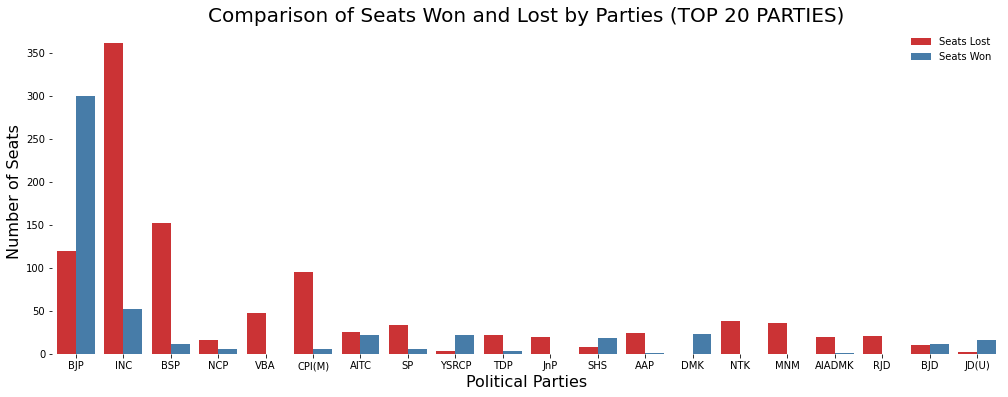

In [ ]:
plt.figure(figsize=(17,6))
ax = sns.countplot(x='PARTY',hue='WINNER',data= compare_seat,palette='Set1')
ax.set_title('Comparison of Seats Won and Lost by Parties (TOP 20 PARTIES)',fontsize=20)
ax.legend(['Seats Lost','Seats Won'],loc='upper right',frameon=False),
ax.set_xlabel('Political Parties',fontsize=16)
ax.set_ylabel('Number of Seats',fontsize=16)

sns.despine(bottom=True,left=True)

Như đã phân tích bên trên, tiềm lực kinh tế chính là bí quyết để đảng BJP thắng áp đảo các bang còn lại, đặc biệt là đảng INC. Trong khi số ghế thua của BJP chỉ trong khoảng 100 đến 150, thì số ghế thua của INC cao gần gấp 3 trong khoảng từ 350 đổ lên trên. Số ghế thắng của BJP một lần nữa lại gấp 6 lần số ghế thắng của INC. 

**Các ứng viên có tiền án thuộc những đảng phái nào(TOP 20)**

In [ ]:
def criminal_or_not(value):
    if value != 0:
        criminal_value = 1
    else:
        criminal_value = 0
    return criminal_value

In [ ]:
df_exclude_NOTA['CRIMINAL BACKGROUND'] = df_exclude_NOTA['CRIMINAL CASES'].apply(criminal_or_not)
df_exclude_NOTA.head()

,STATE,CONSTITUENCY,NAME,WINNER,PARTY,SYMBOL,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,ASSETS,LIABILITIES,GENERAL VOTES,POSTAL VOTES,TOTAL VOTES,OVER TOTAL ELECTORS IN CONSTITUENCY,OVER TOTAL VOTES POLLED IN CONSTITUENCY,TOTAL ELECTORS,Party New,CRIMINAL BACKGROUND
0,Telangana,ADILABAD,SOYAM BAPU RAO,1,BJP,Lotus,MALE,52,52.0,ST,12th Pass,3099414,231450,376892,482,377374,25.330684,35.468248,1489790,BJP,1
1,Telangana,ADILABAD,Godam Nagesh,0,TRS,Car,MALE,0,54.0,ST,Post Graduate,18477888,847000,318665,149,318814,21.399929,29.964370,1489790,Other,0
2,Telangana,ADILABAD,RATHOD RAMESH,0,INC,Hand,MALE,3,52.0,ST,12th Pass,36491000,15300000,314057,181,314238,21.092771,29.534285,1489790,INC,1
4,Uttar Pradesh,AGRA,Satyapal Singh Baghel,1,BJP,Lotus,MALE,5,58.0,SC,Doctorate,74274036,8606522,644459,2416,646875,33.383823,56.464615,1937690,BJP,1
5,Uttar Pradesh,AGRA,Manoj Kumar Soni,0,BSP,Elephant,MALE,0,47.0,SC,Post Graduate,133784385,22251891,434199,1130,435329,22.466390,37.999125,1937690,BSP,0


In [ ]:
# Creating a Series consisting of Names of Top 20 Political Parties having most number of CRIMINAL CANDIDATES
top_20_crim_cand_parties = df_exclude_NOTA['PARTY'][df_exclude_NOTA['CRIMINAL CASES']!='0'].sort_index().value_counts().head(20)
top_20_crim_cand_parties = top_20_crim_cand_parties.index
top_20_crim_cand_parties

Index(['BJP', 'INC', 'IND', 'BSP', 'CPI(M)', 'VBA', 'AITC', 'SP', 'NTK', 'MNM',
       'SHS', 'AAP', 'TDP', 'YSRCP', 'DMK', 'RJD', 'AIADMK', 'NCP', 'BJD',
       'JnP'],
      dtype='object')

In [ ]:
# Creating DataFrame consisting of Top 20 Political Parties having most number of CRIMINAL CANDIDATES
df_top_20_criminal_parties = df_exclude_NOTA.copy()
for party,index in zip(df_top_20_criminal_parties['PARTY'],df_top_20_criminal_parties['PARTY'].index):
    if party not in top_20_crim_cand_parties:
        df_top_20_criminal_parties.drop(index=index, inplace=True)

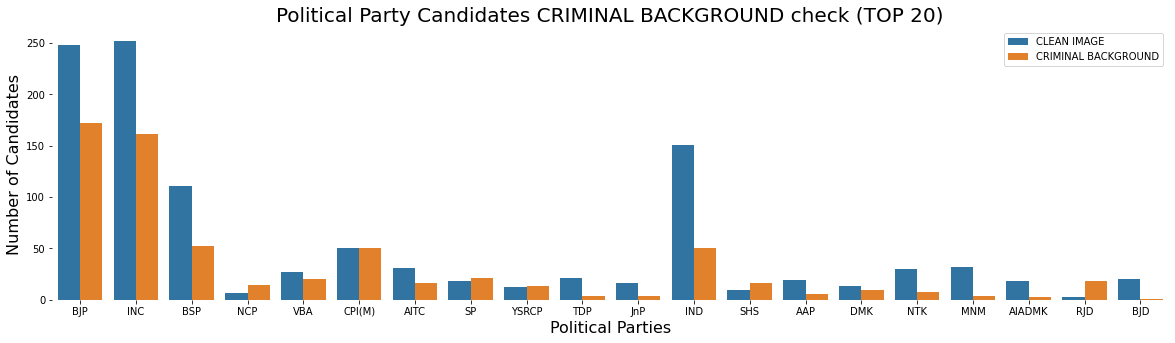

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.countplot(data=df_top_20_criminal_parties,x='PARTY',hue='CRIMINAL BACKGROUND')

ax.legend(['CLEAN IMAGE','CRIMINAL BACKGROUND'],loc='upper right')
ax.set_title('Political Party Candidates CRIMINAL BACKGROUND check (TOP 20)',fontsize=20)
ax.set_ylabel('Number of Candidates',fontsize=16)
ax.set_xlabel('Political Parties',fontsize=16)

sns.despine(bottom=True,left=True)

BJP và INC là 2 đảng có đông ứng cử viên nhất đồng thời là 2 đảng có nhiều ứng viên có tiền án nhất.Theo sau đó là IND với 201 ứng cử viên tham gia ứng cử và BSP là 163 ứng cử viên. Nhìn vào biểu đồ ta có thể thấy, gần 1/3 ứng cử viên của đảng IND tham gia ứng cử có tiền án và gần 1/2 ứng cử viên của đảng BSP có tiền án tiền sự .

**Ứng cử viên có tiền án và sự ảnh hưởng thắng thua theo các Đảng phái**


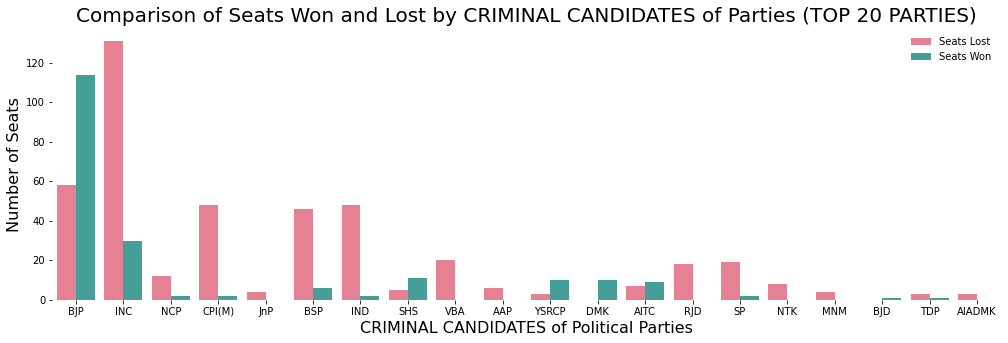

In [ ]:
# Creating DataFrame consisting of only Candidates having CRIMINAL BACKGROUND

df_criminal = pd.DataFrame(columns=df_exclude_NOTA.columns)
df_criminal = df_exclude_NOTA.copy()
df_criminal = df_criminal[df_criminal['CRIMINAL BACKGROUND']==1]

for party,index in zip(df_criminal['PARTY'],df_criminal['PARTY'].index):
    if party not in top_20_crim_cand_parties:
        df_criminal.drop(index=index, inplace=True)
        
# Comparison of Seats Won and Lost by CRIMINAL CANDIDATES of Parties (TOP 20 PARTIES)

plt.figure(figsize=(17,5))
ax = sns.countplot(x='PARTY',hue='WINNER',data=df_criminal,palette='husl')
ax.set_title('Comparison of Seats Won and Lost by CRIMINAL CANDIDATES of Parties (TOP 20 PARTIES)',fontsize=20)
ax.legend(['Seats Lost','Seats Won'],loc='upper right',frameon=False),
ax.set_xlabel('CRIMINAL CANDIDATES of Political Parties',fontsize=16)
ax.set_ylabel('Number of Seats',fontsize=16)

sns.despine(bottom=True,left=True)

Biểu đồ trên đã thể hiện rõ số ghế thắng và thua của các ứng viên liên quan đến tiền án có sự ảnh hưởng và phụ thuộc vào các đảng. 

## **PHÂN TÍCH ỨNG VIÊN**

**Phân hóa độ tuổi giữa các ứng cử viên**

In [ ]:
fig = px.histogram(df_exclude_NOTA, x="AGE")
fig.show()

Độ tuổi của các ứng cử viên phân bố theo phân phối chuẩn với độ tuổi trung bình là 52 tuổi. Từ đây có thể thấy bộ máy nhà nước Ấn Độ đang bị già hóa

**Phân hóa độ tuổi chia theo giới tính của các ứng cử viên**

In [ ]:
fig = px.histogram(df_exclude_NOTA, x="AGE", y="WINNER", color="GENDER")
fig.show()

Độ tuổi trung bình ở nữ thấp hơn độ tuổi trung bình ở nam (Ở nữ là 48 và ở nam là 52)


**Liệu giới tính có ảnh hưởng đến kết quả thắng thua của các ứng cử viên?**

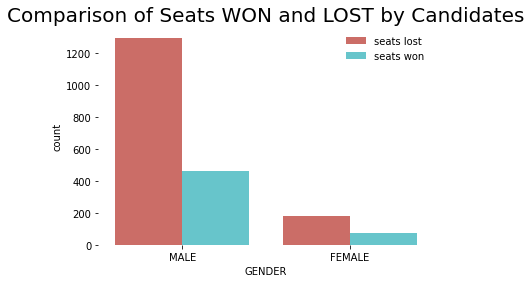

In [ ]:
ax = sns.countplot(data=df_exclude_NOTA,x='GENDER',hue='WINNER',palette='hls')

ax.legend(['seats lost','seats won'],frameon=False)
ax.set_title('Comparison of Seats WON and LOST by Candidates',fontsize=20)
sns.despine(bottom=True,left=True)

Là quốc gia có nạn phân biệt giới tính rất gay gắt thì không có bất ngờ gì khi số lượng nam trúng cử cao gấp 3 lần số lượng nữ  

**Chất lượng và tiêu chuẩn học vấn của người ứng cử**

In [ ]:
education = df_exclude_NOTA[df_exclude_NOTA['EDUCATION'] != 'Not Available']
education = education['EDUCATION'].value_counts().reset_index()
education.columns = ['EDUCATION','COUNT']
fig = px.bar(education, x='EDUCATION', y='COUNT', color='COUNT', height=500)
fig.show()

Tổng tỷ lệ những người tốt nghiệp và có trình độ học vấn tham gia cuộc bầu cử là 67,12%, khá thấp so với các quốc gia phát triển khác

**Học vấn và sự thành công của trúng cử viên**

In [ ]:
won_educated_candidates = df_exclude_NOTA[df_exclude_NOTA['WINNER']==1]
fig = px.bar(won_educated_candidates, x='EDUCATION', y='WINNER', color='EDUCATION', height=500).update_xaxes(categoryorder = "total descending")
fig.show()

Tổng tỷ lệ những người tốt nghiệp và có trình độ học vấn tham gia cuộc bầu cử là 67.12%, trong đó số người chiến thắng chiếm đến 72.17% . Đây thực sự là một dấu hiệu tích cực, vì các chính trị gia có học thức là một nhân tố rất quan trọng đối với sự phát triển của một đất nước. Nhưng vẫn còn khoảng 28% các chính trị gia không có bằng cấp chuyên nghiệp. Hy vọng với thời gian trôi qua, hội đồng bầu cử sẽ có thể cải thiện yếu tố này và coi bằng cấp giáo dục là yêu cầu chính trong khi bỏ phiếu!

**Tổng tài sản và nợ của ứng cử viên chiến thắng**

In [ ]:
as_liab=df_exclude_NOTA[['NAME','PARTY','ASSETS','LIABILITIES','STATE','CONSTITUENCY','WINNER']]
as_liab.WINNER.replace({1:'Yes',0:'No'},inplace=True)
win_as_liab = as_liab[as_liab['WINNER']=='Yes']
win_as_liab.sort_values(by='ASSETS',ascending=False,inplace=True)
fig = px.scatter(win_as_liab, x='ASSETS', y='LIABILITIES', 
                 color='STATE',size='ASSETS', 
                 hover_data=(['NAME','PARTY','CONSTITUENCY','STATE','WINNER']))
fig.update_layout(title_text='Assets vs Liabilities for the Winning Politicians',template='plotly_dark')
fig.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Sau khi vẽ biểu đồ phân tán (scatter plot) thì ta thấy dữ liệu không có dạng tuyến tính nên không có mối tương quan hợp lệ nào có thể được suy ra đối với tài sản và nợ phải trả.

## **DỰ ĐOÁN**

**Dự đoán người chiến thắng bằng cách sử dụng Random Forest**

In [ ]:
vote_df=df_exclude_NOTA.copy()
vote_df['GENDER'].replace({'MALE':1,'FEMALE':2},inplace=True)
vote_df['CATEGORY'].replace({'GENERAL':1,'SC':2,'ST':3},inplace=True)
i=1
parties_dict={}
for j in vote_df['PARTY']:
    if j in parties_dict:
        continue
    else:
        parties_dict[j]=i
        i+=1
vote_df['PARTY'].replace(parties_dict,inplace=True)
a=1
edu_dict={}
for b in vote_df['EDUCATION']:
    if b in edu_dict:
        continue
    else:
        edu_dict[b]=a
        a+=1
vote_df['EDUCATION'].replace(edu_dict,inplace=True)

Để dự đoán ứng cử viên chiến thắng, trước tiên chúng ta cần chọn các cột cần thiết để dự đoán và loại trừ tất cả các cột dư thừa. Ngoài ra, chúng tôi muốn phân loại các cột thành các cột phân loại & số

In [ ]:
df0 = vote_df[['STATE','CONSTITUENCY','WINNER','PARTY','SYMBOL','GENDER','CRIMINAL CASES','AGE',
               'CATEGORY','EDUCATION','TOTAL VOTES','TOTAL ELECTORS','ASSETS','LIABILITIES']]
num_cols = ['PARTY','EDUCATION','CRIMINAL CASES','AGE','TOTAL VOTES','TOTAL ELECTORS','ASSETS','CATEGORY','LIABILITIES','GENDER']

Vì tập dữ liệu không cân đối nên để cân bằng tập dữ liệu, chúng ta cần lấy mẫu lên hoặc lấy mẫu xuống tập dữ liệu. Việc lấy mẫu xuống của lớp đa số có thể làm mất đi một số thông tin quan trọng. Vì vậy, chúng tôi sẽ lấy mẫu lớp thiểu số bằng cách sử dụng **resample**. Trước khi làm điều đó, chúng ta cần chia tỷ lệ các cột phân loại bằng **get_dummies** và các cột số bằng thư viện **StandardScaler**.

**Data Scaling** 

In [ ]:
dataset = pd.get_dummies(df0)
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = num_cols
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale]) 
dataset.head()

,WINNER,PARTY,GENDER,CRIMINAL CASES,AGE,CATEGORY,EDUCATION,TOTAL VOTES,TOTAL ELECTORS,ASSETS,LIABILITIES,STATE_Andaman & Nicobar Islands,STATE_Andhra Pradesh,STATE_Arunachal Pradesh,STATE_Assam,STATE_Bihar,STATE_Chandigarh,STATE_Chhattisgarh,STATE_Dadra & Nagar Haveli,STATE_Daman & Diu,STATE_Goa,STATE_Gujarat,STATE_Haryana,STATE_Himachal Pradesh,STATE_Jammu & Kashmir,STATE_Jharkhand,STATE_Karnataka,STATE_Kerala,STATE_Lakshadweep,STATE_Madhya Pradesh,STATE_Maharashtra,STATE_Manipur,STATE_Meghalaya,STATE_Mizoram,STATE_NCT OF Delhi,STATE_Nagaland,STATE_Odisha,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,...,SYMBOL_Mixee,SYMBOL_Nagara,SYMBOL_Nangol,SYMBOL_Pan,SYMBOL_Pen Nib with Seven Rays,SYMBOL_Plastering Trowel,SYMBOL_Plough,SYMBOL_Pot,SYMBOL_Pressure Cooker,SYMBOL_Refrigerator,SYMBOL_Ring,SYMBOL_Rising Sun,SYMBOL_Road Roller,SYMBOL_SHIP,SYMBOL_Saw,SYMBOL_Scales,SYMBOL_Scissors,SYMBOL_Sewing Machine,SYMBOL_Sitar,SYMBOL_Spade & Stoker,SYMBOL_Spanner,SYMBOL_Spectacles,SYMBOL_Star,SYMBOL_Stethoscope,SYMBOL_Table,SYMBOL_Table Lamp,SYMBOL_Telephone,SYMBOL_Television,SYMBOL_Tent,SYMBOL_Throwing a Javelin,SYMBOL_Tiller,SYMBOL_Tractor Chalata Kisan,SYMBOL_Triangle,SYMBOL_Truck,SYMBOL_Two Leaves,SYMBOL_Tyres,SYMBOL_Umbrella,SYMBOL_Walking Stick,SYMBOL_Water Melon,SYMBOL_Whistle
0,1,-0.628979,-0.382872,6.620242,-0.023051,2.251127,-1.242514,0.332957,-0.538876,-0.311731,-0.218126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,-0.583879,-0.382872,-0.190426,0.145491,2.251127,-0.872637,0.103781,-0.538876,-0.274420,-0.211243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,-0.538780,-0.382872,0.202498,-0.023051,2.251127,-1.242514,0.085873,-0.538876,-0.230717,-0.049632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,-0.628979,-0.382872,0.464446,0.482577,0.816718,-0.502761,1.387657,0.876978,-0.139047,-0.124477,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,-0.493681,-0.382872,-0.190426,-0.444408,0.816718,-0.872637,0.559766,0.876978,0.005336,0.028103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Up-Sampling (Lấy mẫu ngược tầng lớp thiểu số)**

In [ ]:
from sklearn.utils import resample
df_not_winner = dataset[dataset.WINNER == 0]
df_winner = dataset[dataset.WINNER == 1]
df_winner_upsampled = resample(df_winner, replace = True,n_samples = 1479, random_state = 0) 
df_total_upsampled = pd.concat([df_not_winner, df_winner_upsampled])
df_total_upsampled .WINNER.value_counts()

1    1479
0    1479
Name: WINNER, dtype: int64

Bây giờ như chúng ta có thể thấy tập dữ liệu đã được cân bằng nên chúng tôi có thể chia tập dữ liệu bây giờ thành các biến phụ thuộc & độc lập

In [ ]:
y = df_total_upsampled['WINNER']
X = df_total_upsampled.drop(['WINNER'], axis = 1)

**Random Forest Classifier**


Chúng tôi sẽ sử dụng ***Random Forest Classifier*** để dự đoán những người chiến thắng trong cuộc bầu cử. Để biết số cây tối ưu cần thiết để dự đoán kết quả với độ chính xác cao nhất, chúng tôi sẽ vẽ biểu đồ điểm chính xác cho các giá trị khác nhau của k và sẽ chọn giá trị k mang lại độ chính xác cao nhất.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rfc_scores = []
for k in range(1,50):
    randomforest_classifier= RandomForestClassifier(n_estimators=k,random_state=0)
    score=cross_val_score(randomforest_classifier,X,y,cv=10)
    rfc_scores.append(score.mean())

fig=px.scatter(x=[k for k in range(1, 50)],y= rfc_scores,color=rfc_scores,size=rfc_scores)
fig.update_layout(title_text='Random Forest Classifier scores for different K values',template='plotly_dark')
fig.show()

Như chúng ta có thể thấy từ đồ thị, độ chính xác của đồ thị là lớn nhất ở k = 30. Do đó, chúng tôi sẽ chọn n_estimators = 30.

In [ ]:
-randomforest_classifier= RandomForestClassifier(n_estimators=30,random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
print('% Accuracy :', round(score.mean()*100,4))

% Accuracy : 95.8428


Chúng tôi đã đạt được độ chính xác khoảng 95.8% bằng cách sử dụng Bộ phân loại rừng ngẫu nhiên.

## **TỔNG KẾT**

**Sau khi phân tích mô hình bỏ phiếu của người Ấn Độ, chúng tôi đã đưa ra một số kết luận như sau:**

1. Vào năm 2019, **Đảng Bharatiya Janata (BJP)** đã **giành được nhiều ghế nhất trên toàn Ấn Độ** - chiếm ưu thế rõ ràng hơn so với các đảng phái còn lại. Sự tiếp cận do họ tạo ra đã thực sự khiến họ khẳng định được vị trí của mình trong Lok Sabha.
2. Nói chung, **giáo dục** được coi là **một yếu tố quan trọng** trong khi bỏ phiếu. Khoảng **72% trở lên** trong số những người chiến thắng có bằng cấp và tốt nghiệp. Đây là một yếu tố quan trọng đối với một quốc gia đang phát triển như Ấn Độ - nơi chúng ta cần những chính trị gia có học thức để lãnh đạo đất nước.
3. Sự tham gia của các **ứng cử viên nữ ít hơn nhiều so với các ứng cử viên nam**. Tỷ lệ giới tính cân bằng sẽ tốt hơn vì mọi người từ các thành phần khác nhau đều đóng góp vào sự tiến bộ của xã hội làm cho nó ngày một tốt hơn.
4. **Độ tuổi trung bình của các ứng cử viên khá cao**. Nó có thể là một lợi thế đối với các ứng cử viên trẻ tuổi có khả năng lãnh đạo quốc gia tranh cử. Mặc dù không chắc chắn rằng các chính trị gia lớn tuổi sẽ không thể thực hiện tốt nhiệm vụ của họ - nhưng nó đi kèm với rủi ro về sức khỏe và các vấn đề liên quan đến tuổi tác.
5. Các **ứng cử viên trúng cử có tiền án** là một **mối quan tâm nghiêm trọng** vì những người được người dân bầu chọn - gián tiếp là bộ mặt của quốc gia. Họ nên có một hình mẫu tốt hơn là một người không được xã hội tôn trọng.
6. Như dự đoán của chúng tôi đã đề xuất, chúng tôi đã đạt **độ chính xác 95,8%** trong việc ước tính những người tham gia chiến thắng bằng cách sử dụng mô hình Random Forest.